In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
import os, string
import matplotlib.pyplot as plt

In [2]:
sz = 200
# Step 1 - Building the CNN

# Initializing the CNN
classifier = Sequential()

# First convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# third convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Flattening the layers
classifier.add(Flatten())

# Adding a fully connected layer
#units changed 128 to 400 - 500 - 200
classifier.add(Dense(units=200, activation='relu'))
classifier.add(Dropout(0.40))
#units changed 96 to 800 - 300 - 150
classifier.add(Dense(units=150, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=26, activation='softmax')) # softmax for more than 2

# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy for more than 2


In [3]:
# Step 2 - Preparing the train/test data and training the model
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rotation_range=10, # rotate the image 30 degrees
        width_shift_range=0.1, # Shift the pic width by a max of 10%
        height_shift_range=0.1, # Shift the pic height by a max of 10%
        rescale=1/255, # Rescale the image by normalzing it.
        shear_range=0.2, # Shear means cutting away part of the image (max 20%)
        zoom_range=0.2, # Zoom in by 20% max
        horizontal_flip=True, # Allo horizontal flipping
        fill_mode='nearest' # Fill in missing pixels with the nearest filled value
        )
test_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.15,
                                  zoom_range=0.1,
                                  width_shift_range=0.15,
                                  height_shift_range=0.1,
                                  fill_mode='nearest')

In [5]:
training_set = train_datagen.flow_from_directory('./ProcessedData/train',
                                                 target_size=(sz, sz),
                                                 batch_size=10,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('./ProcessedData/test',
                                            target_size=(sz , sz),
                                            batch_size=10,
                                            color_mode='grayscale',
                                            class_mode='categorical') 

Found 13000 images belonging to 26 classes.
Found 5200 images belonging to 26 classes.


In [6]:
training_set.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [7]:
test_set.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [8]:
history = classifier.fit(
        training_set,
        steps_per_epoch=449, 
        epochs=10,
        validation_data=test_set,
        validation_steps=190)

Epoch 1/10
449/449 [==============================] - 116s 258ms/step - loss: 2.3668 - accuracy: 0.2824 - val_loss: 1.0020 - val_accuracy: 0.6989
Epoch 2/10
449/449 [==============================] - 116s 259ms/step - loss: 0.8516 - accuracy: 0.7232 - val_loss: 0.4695 - val_accuracy: 0.8453
Epoch 3/10
449/449 [==============================] - 116s 258ms/step - loss: 0.5506 - accuracy: 0.8241 - val_loss: 0.3754 - val_accuracy: 0.8768
Epoch 4/10
449/449 [==============================] - 112s 249ms/step - loss: 0.3850 - accuracy: 0.8686 - val_loss: 0.3571 - val_accuracy: 0.8932
Epoch 5/10
449/449 [==============================] - 115s 256ms/step - loss: 0.3314 - accuracy: 0.8940 - val_loss: 0.3025 - val_accuracy: 0.9184
Epoch 6/10
449/449 [==============================] - 113s 252ms/step - loss: 0.2823 - accuracy: 0.9069 - val_loss: 0.2552 - val_accuracy: 0.9289
Epoch 7/10
449/449 [==============================] - 114s 254ms/step - loss: 0.2230 - accuracy: 0.9278 - val_loss: 0.2568 -

In [82]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2
#Importing testing image
test_file = './ProcessedData/Test/O/90.jpg'
test_img = image.load_img(test_file,target_size=(200, 200))
test_img = image.img_to_array(test_img)
test_img = cv2.cvtColor(np.array(test_img),cv2.COLOR_RGB2GRAY)

In [83]:
test_img.shape

(200, 200)

In [84]:
test_img = np.expand_dims(test_img, axis=0)
test_img = test_img/255

In [85]:
prediction_prob = classifier.predict(test_img)

In [86]:
prediction_prob

array([[3.7074392e-04, 7.3116802e-09, 1.0182193e-06, 1.9247473e-05,
        2.7202714e-14, 9.0756992e-13, 1.3582324e-10, 1.3452343e-08,
        6.5049144e-10, 2.5207953e-15, 9.1436754e-12, 2.2650744e-13,
        3.9704760e-11, 7.2058405e-12, 9.9958676e-01, 2.1284053e-05,
        1.6303677e-09, 4.0162290e-11, 5.4042528e-07, 1.9722147e-07,
        4.4554817e-08, 1.1456573e-09, 1.5322382e-08, 5.8045856e-08,
        2.9800531e-10, 2.1971114e-09]], dtype=float32)

In [87]:
np.argmax(prediction_prob)

14

In [88]:
classes = list(string.ascii_uppercase)

In [89]:
classes[np.argmax(prediction_prob)]

'O'

In [17]:
#saving the model
import os
if not os.path.exists("./Model"):
    os.mkdir("./Model")
classifier.save("./Model/Sign_classifier.h5")

In [18]:
classifier_Json = classifier.to_json()
with open("./Model/classifier_json.json", "w") as json_file:
    json_file.write(classifier_Json)
print('json model saved')
classifier.save_weights('./Model/classifier_weights.h5')
print('Weights saved')

json model saved
Weights saved


# Classifier Building - Completed

In [19]:
from tensorflow.keras.models import model_from_json

In [20]:
model_json = None
with open("./Model/classifier_json.json", "r") as file:
    model_json = file.read()
loaded_model = model_from_json(model_json)
loaded_model.load_weights('./Model/classifier_weights.h5')

In [91]:
pred = classifier.predict(test_set)

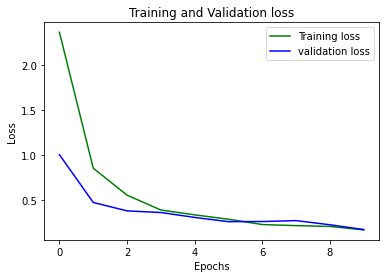

In [95]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,10)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

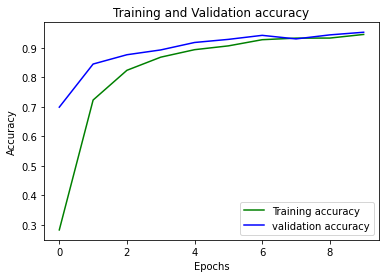

In [94]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(0,10)
plt.plot(epochs, train_accuracy, 'g', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()